# Instituto Tecnológico de Santo Domingo
## Aplicaciones de los Métodos de Optimización Cuasi-Newton en Aprendizaje Profundo

VERSION NO FINAL

Considerar un problema de optimizacion no restringido con la funcion multimodal de Himmelblau de 2 dimensiones $f(x)$: $\mathbb{R}$ → $\mathbb{R}$

\begin{equation}
\begin{aligned}
\min_{x} \quad & (x_1^2 + x_2 - 11)^2  + (x_1 + x_2^2 - 7)^2\\
\end{aligned}
\end{equation}

Gradiente de $f(x)$:

$$\nabla f(x) =\begin{bmatrix}
2 x_1 + 4x_1 (x_1^2 + x_2 - 11) + 2x_2^2 - 14\\
2x_2 + 4x_2 (x_2^2 + x_1 - 7)+ 2x_1^2 - 22\\
\end{bmatrix}$$

Existen 9 posibles resultados de minimos, entre los cuales se encuentran:
$$ x=[3, 2]$$
$$ x=[3.39, 0.07]$$
$$ x=[-2.81, 3.13]$$
$$ x=[3.58, -1.84]$$
$$ x=[-3.07, -0.08]$$

In [9]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize

# Funcion objetivo
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2 # funcion objetivo

# Gradiente de funcion objetivo
def f1(x):
    return np.array([2*x[0] + 4*x[0] * (x[0]**2 + x[1] - 11) + 2*x[1]**2 - 14,
                    2*x[1] + 4*x[1] * (x[1]**2 + x[0] - 7) + 2*x[0]**2 - 22]) # gradiente de la funcion


<Figure size 432x288 with 0 Axes>

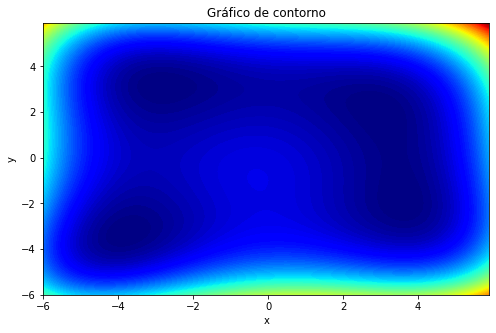

In [95]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig, axes = plt.subplots(1,1, sharey=True, figsize=(8,5))
#ax = Axes3D(fig, azim = -29, elev = 49)
X = np.arange(-6, 6, 0.1)
Y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X*X+Y-11)**2 + (X+Y*Y-7)**2
#ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
axes.contourf(X, Y, Z, levels=100, cmap = cm.jet)
plt.title('Gráfico de contorno')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Metodo BFGS

In [80]:
'''
    Referencias: https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
    https://habr.com/ru/post/333356/
    https://github.com/bgranzow/L-BFGS-B

Consultado el PseudoCodigo del Metodo: 
- CG, BFGS and SR1 4.1 Project descriptions - UCI Canvas
'''

def metodo_bfgs(f, fprime, x0, 
                maxiter=1000, epsi=10e-3):
    """
    Minimizar una función f usando el algoritmo BFGS.
    
    Parámetros
    ----------
    f : f(x)
        Función a minimizar.
    x0 : ndarray
        Estimación inicial.
    fprime : fprime(x)
        El gradiente de `func`.
    """

    # valores iniciales
    k = 0
    gfk = fprime(x0)
    N = len(x0)
    # Matriz de identidad para inicializar h_k
    I = np.eye(N, dtype=int)
    Hk = I
    xk = x0
    xk_vect = [xk]
    alpha_k_list = []
    while ln.norm(gfk) > epsi and k < maxiter: #Criterios de convergencia
        
        # pk - Direccion de busqueda
        pk = -np.dot(Hk, gfk)
        
        # Estrategia utilizada: Busqueda de linea
        # Búsqueda de línea para las condiciones de Wolfe
        line_search = sp.optimize.line_search(f, f1, xk, pk, maxiter=500)
        #alpha_k - Tamaño del paso
        alpha_k = line_search[0]
        #alpha_k = 0.05
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        k += 1
        
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] *
                                                sk[np.newaxis, :]) #H_{k+1}
        alpha_k_list.append(alpha_k) # Guardar listado de alphas usados
        xk_vect.append(xk)# Guardar listado de puntos obtenidos para el grafico

    return (xk_vect, k, alpha_k_list[-5:]) #retornar ultimos 5 alphas

punto_inicial = np.array([1.80, -3.36])
result_bfgs, k_bfgs, alpha_k_bfgs = metodo_bfgs(f, f1, punto_inicial, maxiter=5000)

print('Resultado del metodo BFGS:')
print('Resultado final (minimizacion): %s' % (result_bfgs[-1]))
print('Conteo de iteraciones: %s' % (k_bfgs))
print('Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: %s' % (alpha_k_bfgs))

Resultado del metodo BFGS:
Resultado final (minimizacion): [3.0000129  1.99989823]
Conteo de iteraciones: 8
Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: [0.55533583416922, 0.4127526911544688, 1.0, 1.0, 1.0]


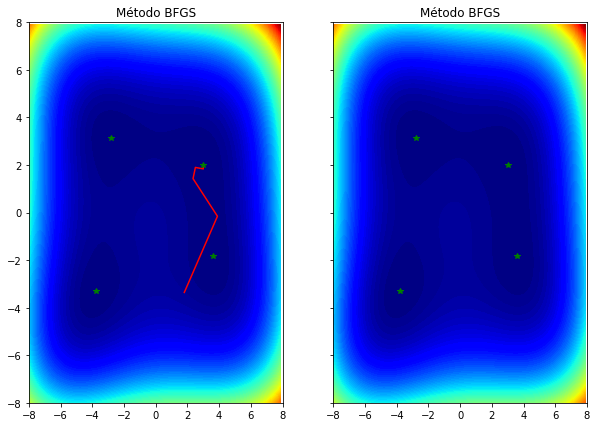

In [85]:
# gráfico de contorno lleno para la función objetivo 2d y mostrar los óptimos
from numpy import arange, meshgrid
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def return_appropriate_result_column(list_of_lists):
    '''
    Funcion que retorna una lista de listas segun puntos resultado del metodo.
    '''
    xvect = [row[0] for row in list_of_lists]
    yvect = [row[1] for row in list_of_lists]
    return [xvect, yvect]

# definir el rango del input
r_min, r_max = -8.0, 8
# rango de entrada de muestra uniformemente en incrementos de 0.1
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# crear una malla a partir del eje
x, y = meshgrid(xaxis, yaxis)
# computar objetivos
results = f([x, y])

# definir set de pasos tomados para llegar al optimo
optima_x = return_appropriate_result_column(result_bfgs)

method = 'BFGS'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite    
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 2
    ax.plot(-3.77931025, -3.28318599, '*', color='green') # Punto de optimos 3
    ax.plot(-2.805118, 3.1313125, '*', color='green') # Punto de optimos 4
    ax.set_title('Método {0}'.format(method))
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

### Metodo SR1

In [76]:
'''
Consultado el PseudoCodigo del Metodo: 
- CG, BFGS and SR1 4.1 Project descriptions - UCI Canvas
'''

def metodo_sr1(f, fprime, x0, 
               maxiter=None, epsi=10e-3):
    '''
    Implementacion del metodo cuasi-Newton SR1 (Symmetric Rank 1)
    '''

    # valores iniciales
    k = 0
    gfk = fprime(x0)
    N = len(x0)
    # matriz de identidad para inicializar p_k
    I = np.eye(N, dtype=int) 
    Hk = I # Inicializar Hk con la matriz identidad de tamaño N
    xk = x0
    alpha_k_list = []
    xk_vect = [xk]
    while ln.norm(gfk) > epsi and k < maxiter: #Criterios de convergencia
        
        # pk - Direccion de busqueda        
        pk = -np.dot(Hk, gfk)
        
        #LINE SEARCH
        # Constantes de búsqueda de línea para las condiciones de Wolfe.
        line_search = sp.optimize.line_search(f, f1, xk, pk, maxiter=500)
        # alpha_k - Tamaño del paso
        alpha_k = line_search[0]
        #alpha_k = 0.025 
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        k += 1

        A1 = np.dot(Hk, yk) - sk
        Hk = Hk - (np.dot(A1[:, np.newaxis], A1[np.newaxis, :])/np.dot(A1[np.newaxis, :], yk))
        alpha_k_list.append(alpha_k) # Guardar listado de alphas usados
        xk_vect.append(xk) # Guardar listado de puntos obtenidos para el grafico

    return (xk_vect, k, alpha_k_list[-5:])

punto_inicial = np.array([0,0])
result_sr1, k_sr1, alpha_k_sr1 = metodo_sr1(f, f1, punto_inicial, maxiter=5000)

print('Resultado del metodo SR1:')
print('Resultado final (minimizacion): %s' % (result_sr1[-1]))
print('Conteo de iteraciones: %s' % (k_sr1))
print('Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: %s' % (alpha_k_sr1))

Resultado del metodo SR1:
Resultado final (minimizacion): [2.99996594 1.99983838]
Conteo de iteraciones: 8
Ultimos 5 valores de alpha_k optimos que satisfacen condiciones Wolfe: [1.0, 1.0, 1.0, 1.0, 1.0]


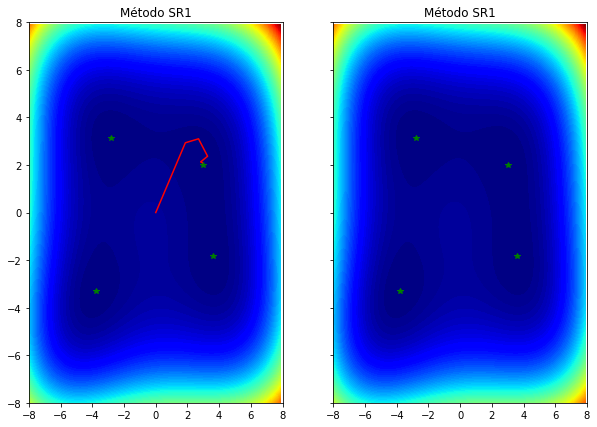

In [96]:
# definir set de pasos tomados para llegar al optimo
optima_x = return_appropriate_result_column(result_sr1) #Resultados de SR1 aplicados a la funcion

method = 'SR1'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite    
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 2
    ax.plot(-3.77931025, -3.28318599, '*', color='green') # Punto de optimos 3
    ax.plot(-2.805118, 3.1313125, '*', color='green') # Punto de optimos 4
    ax.set_title('Método {0}'.format(method))
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

### Metodo de Newton

In [108]:
def hessian_function(x):
    '''
    Predefinir el hessiano de la funcion.
    '''
    return np.array([[12*x[0]**2+4*x[1]-42, 4*x[0]+4*x[1]], 
                     [4*x[0]+4*x[1],        12*x[1]**2+4*x[0]-26]])


def metodo_newton(f, fprime, hessian, 
                  x0, maxiter=5000, epsi=10e-3):    
    '''
    Implementacion del metodo de Newton-Raphson.
    '''
    
    k = 0 # Iniciar conteo de iteraciones
    gfk = fprime(x0) #jacobiano
    Hk = hessian(x0) #hessiano
    xk = x0
    xk_vect = [xk]
    S = np.linalg.inv(Hk) # Direccion de busqueda

    while ln.norm(gfk) > epsi or k < maxiter:
        
        xk = xk - np.dot(S, gfk)
        k+=1
        xk_vect.append(xk)
        gfk = fprime(xk)
        Hk = hessian(xk)
        S = np.linalg.inv(Hk)

    return xk_vect, k


punto_inicial = np.array([2,2]) #set de puntos iniciales
result_newton, k_newton = metodo_newton(f, f1, hessian_function, punto_inicial)

print('Resultado del metodo de Newton:')
print('Resultado final (minimizacion): %s' % (result_newton[-1]))
print('Conteo de iteraciones: %s' % (k_newton))

Resultado del metodo de Newton:
Resultado final (minimizacion): [ 3.58442834 -1.84812653]
Conteo de iteraciones: 5000


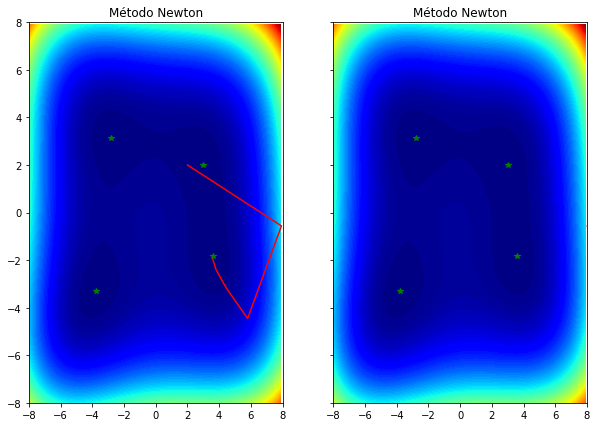

In [109]:
optima_x = return_appropriate_result_column(result_newton) #Resultados de Newton aplicados a la funcion

method = 'Newton'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite    
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 2
    ax.plot(-3.77931025, -3.28318599, '*', color='green') # Punto de optimos 3
    ax.plot(-2.805118, 3.1313125, '*', color='green') # Punto de optimos 4
    ax.set_title('Método {0}'.format(method))
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

Este metodo es mas sensible al punto inicial que los demas metodos. Se observa como el metodo se acerca a otro de los minimos validos, sin converger al nivel indicado (epsilon) luego de 5,000 iteraciones.

### Metodo de descenso de gradiente

In [102]:
def metodo_gradient_descent(f, fprime, x0,
                            maxiter=5000, epsi=10e-3):
    '''
    Implementacion del metodo del maximo descenso.
    '''
    k = 0 # Iniciar conteo de iteraciones
    gfk = fprime(x0)
    xk = x0
    xk_vect = [xk]
    alpha = 0.01 #alpha busqueda de linea fijo
    while ln.norm(gfk) > epsi or k < maxiter:        
        xk = xk - alpha * gfk
        k+=1
        xk_vect.append(xk)
        gfk = fprime(xk)

    return xk_vect, k

punto_inicial = np.array([-6,0])
result_GD, k_GD = metodo_gradient_descent(f, f1, punto_inicial)

print('Resultado del metodo de GD:')
print('Resultado final (minimizacion): %s' % (result_GD[-1]))
print('Conteo de iteraciones: %s' % (k_GD))

Resultado del metodo de GD:
Resultado final (minimizacion): [3. 2.]
Conteo de iteraciones: 5000


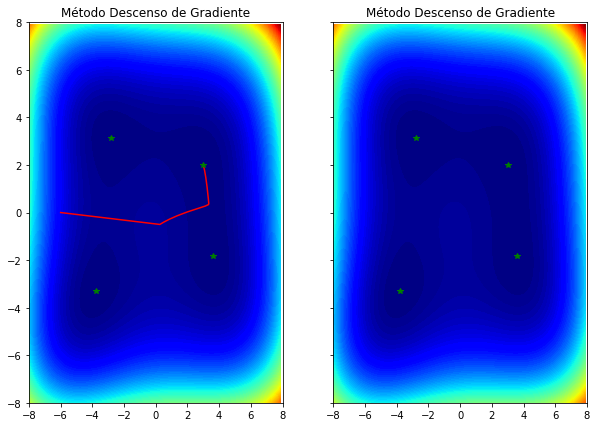

In [111]:
optima_x = return_appropriate_result_column(result_GD) #Resultados de GD aplicados a la funcion

method = 'Descenso de Gradiente'
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,7))
for ax, zord in zip(axes, [1,-1]):
    # crear un gráfico de contorno lleno con 100 niveles y un esquema de color jet
    ax.contourf(x, y, results, levels=100, cmap='jet')
    ax.autoscale(False) # Para evitar que cambios de límite
    ax.plot(optima_x[0], optima_x[1], zorder=zord, color='red')
    ax.plot(3, 2, '*', color='green') # Punto de optimos 1
    ax.plot(3.5844, -1.8481, '*', color='green') # Punto de optimos 2
    ax.plot(-3.77931025, -3.28318599, '*', color='green') # Punto de optimos 3
    ax.plot(-2.805118, 3.1313125, '*', color='green') # Punto de optimos 4
    ax.set_title('Método {0}'.format(method))
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(r_min, r_max)

A este metodo le cuesta mucho mas lograr converger al mismo nivel de epsilon indicado, ademas de ser sensible al punto inicial.

# Aplicaciones en redes neuronales

## Instalar dependencias
Convolutional Neural Networks

In [ ]:
#!pip install tensorflow==1.13.2
#! /usr/bin/env python
# -*- coding: utf-8 -*-
# vim:fenc=utf-8
#
# Copyright © 2019 Pi-Yueh Chuang <pychuang@gwu.edu>
#
# Distributed under terms of the MIT license.

"""An example of using tfp.optimizer.lbfgs_minimize to optimize a TensorFlow model.
This code shows a naive way to wrap a tf.keras.Model and optimize it with the L-BFGS
optimizer from TensorFlow Probability.
Python interpreter version: 3.6.9
TensorFlow version: 2.0.0
TensorFlow Probability version: 0.8.0
NumPy version: 1.17.2
Matplotlib version: 3.1.1
"""
import numpy
import tensorflow as tf
import tensorflow_probability as tfp
from matplotlib import pyplot

def function_factory(model, loss, train_x, train_y):
    """A factory to create a function required by tfp.optimizer.lbfgs_minimize.
    Args:
        model [in]: an instance of `tf.keras.Model` or its subclasses.
        loss [in]: a function with signature loss_value = loss(pred_y, true_y).
        train_x [in]: the input part of training data.
        train_y [in]: the output part of training data.
    Returns:
        A function that has a signature of:
            loss_value, gradients = f(model_parameters).
    """

    # obtain the shapes of all trainable parameters in the model
    shapes = tf.shape_n(model.trainable_variables)
    n_tensors = len(shapes)

    # we'll use tf.dynamic_stitch and tf.dynamic_partition later, so we need to
    # prepare required information first
    count = 0
    idx = [] # stitch indices
    part = [] # partition indices

    for i, shape in enumerate(shapes):
        n = numpy.product(shape)
        idx.append(tf.reshape(tf.range(count, count+n, dtype=tf.int32), shape))
        part.extend([i]*n)
        count += n

    part = tf.constant(part)

    @tf.function
    def assign_new_model_parameters(params_1d):
        """A function updating the model's parameters with a 1D tf.Tensor.
        Args:
            params_1d [in]: a 1D tf.Tensor representing the model's trainable parameters.
        """

        params = tf.dynamic_partition(params_1d, part, n_tensors)
        for i, (shape, param) in enumerate(zip(shapes, params)):
            model.trainable_variables[i].assign(tf.reshape(param, shape))

    # now create a function that will be returned by this factory
    @tf.function
    def f(params_1d):
        """A function that can be used by tfp.optimizer.lbfgs_minimize.
        This function is created by function_factory.
        Args:
           params_1d [in]: a 1D tf.Tensor.
        Returns:
            A scalar loss and the gradients w.r.t. the `params_1d`.
        """

        # use GradientTape so that we can calculate the gradient of loss w.r.t. parameters
        with tf.GradientTape() as tape:
            # update the parameters in the model
            assign_new_model_parameters(params_1d)
            # calculate the loss
            loss_value = loss(model(train_x, training=True), train_y)

        # calculate gradients and convert to 1D tf.Tensor
        grads = tape.gradient(loss_value, model.trainable_variables)
        grads = tf.dynamic_stitch(idx, grads)

        # print out iteration & loss
        f.iter.assign_add(1)
        tf.print("Iter:", f.iter, "loss:", loss_value)

        # store loss value so we can retrieve later
        tf.py_function(f.history.append, inp=[loss_value], Tout=[])

        return loss_value, grads

    # store these information as members so we can use them outside the scope
    f.iter = tf.Variable(0)
    f.idx = idx
    f.part = part
    f.shapes = shapes
    f.assign_new_model_parameters = assign_new_model_parameters
    f.history = []

    return f

def plot_helper(inputs, outputs, title, fname):
    """Plot helper"""
    pyplot.figure()
    pyplot.tricontourf(inputs[:, 0], inputs[:, 1], outputs.flatten(), 100)
    pyplot.xlabel("x")
    pyplot.ylabel("y")
    pyplot.title(title)
    pyplot.colorbar()
    pyplot.savefig(fname)

if __name__ == "__main__":

    # use float64 by default
    tf.keras.backend.set_floatx("float64")

    # prepare training data
    x_1d = numpy.linspace(-1., 1., 11)
    x1, x2 = numpy.meshgrid(x_1d, x_1d)
    inps = numpy.stack((x1.flatten(), x2.flatten()), 1)
    outs = numpy.reshape(inps[:, 0]**2+inps[:, 1]**2, (x_1d.size**2, 1))

    # prepare prediction model, loss function, and the function passed to L-BFGS solver
    pred_model = tf.keras.Sequential(
        [tf.keras.Input(shape=[2,]),
         tf.keras.layers.Dense(64, "tanh"),
         tf.keras.layers.Dense(64, "tanh"),
         tf.keras.layers.Dense(1, None)])

    loss_fun = tf.keras.losses.MeanSquaredError()
    func = function_factory(pred_model, loss_fun, inps, outs)

    # convert initial model parameters to a 1D tf.Tensor
    init_params = tf.dynamic_stitch(func.idx, pred_model.trainable_variables)

    # train the model with L-BFGS solver
    results = tfp.optimizer.lbfgs_minimize(
        value_and_gradients_function=func, initial_position=init_params, max_iterations=500)

    # after training, the final optimized parameters are still in results.position
    # so we have to manually put them back to the model
    func.assign_new_model_parameters(results.position)

    # do some prediction
    pred_outs = pred_model.predict(inps)
    err = numpy.abs(pred_outs-outs)
    print("L2-error norm: {}".format(numpy.linalg.norm(err)/numpy.sqrt(11)))

    # plot figures
    plot_helper(inps, outs, "Exact solution", "ext_soln.png")
    plot_helper(inps, pred_outs, "Predicted solution", "pred_soln.png")
    plot_helper(inps, err, "Absolute error", "abs_err.png")
    pyplot.show()

    # print out history
    print("\n"+"="*80)
    print("History")
    print("="*80)
    print(*func.history, sep='\n')

In [ ]:
!pip install tensorflow-gpu-1.15.5
!pip install git+https://github.com/openai/baselines.git@ea25b9e8b234e6ee1bca43083f8f3cf974143998

In [ ]:
import time
import gym
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from baselines.ppo2 import ppo2
from baselines.common.vec_env.dummy_vec_env import DummyVecEnv

from baselines import deepq
from baselines import bench
from baselines import logger
import tensorflow as tf

from baselines.common.tf_util import make_session

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


https://www.brthor.com/blog/ai/reinforcement-learning/can-reinforcement-learning-be-used-for-classification/

In [ ]:
def keras_train(batch_size=32, epochs=2):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(num_classes, activation="softmax")
        ]
    )

    model.summary()

    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    start_time = time.time()
    model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    end_time = time.time()

    score = model.evaluate(x_test, y_test_one_hot, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("Training Time:", end_time - start_time)

keras_train()

TypeError: ignored